## An adaptive algorithm of pseudo Wigner-Ville Distribution

#### This sample aims to reproduce Figure 5.3 of the book "Time-frequency signal analysis with applications" by Stankovic, Dakovic, and Thayaparan. 


In [1]:
using Winston;using Color;
include("sampledata.jl")


Use "AbstractVecOrMat{T}(" instead.


sampledata

#### data with Gaussian noise

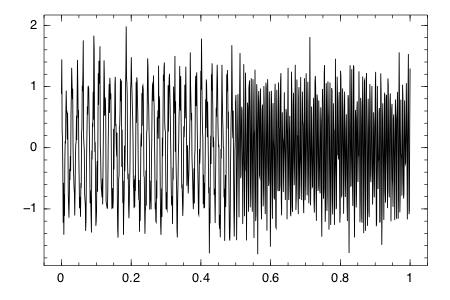

In [432]:
nsample=1024
x,z,iw,ynorm=sampledata.genstepfm(nsample);
using Distributions
d = Normal()
ynoise=real(z)+rand(d,nsample)/3.16
#iynoise=imag(z)+rand(d,nsample)/3.16
#z=ynoise-iynoise
nsample=length(x);dx=x[2]-x[1];freqfac=1/nsample/dx/2;ynorm=pi/x[end];
plot(x,ynoise)

#### Instantaneous (angular) Frequency 

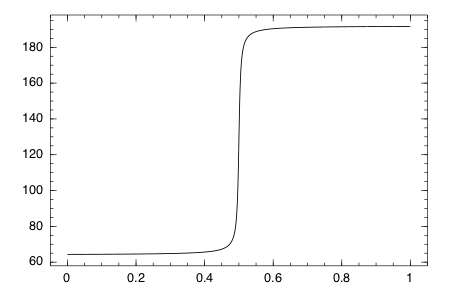

In [431]:
plot(x,iw/(2*pi))

In [433]:
include("jnufft.jl");
include("cohenclass.jl");
include("estif.jl");

In [434]:
import DSP
z=DSP.Util.hilbert(ynoise);

### Wigner Ville Distribution 

Single Wigner Ville


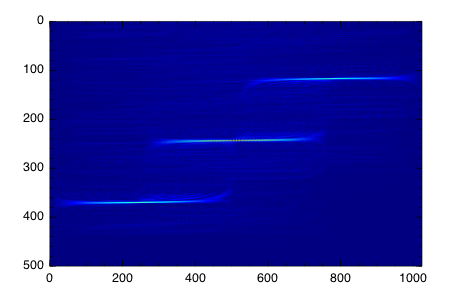

Use fft.


In [439]:
tfr=cohenclass.tfrwv(z);indfwv=extif.maxif(abs(tfr));imagesc(abs(tfr[500:-1:1,:]))

### pseudo Wigner Ville with N/4 window and N/16
### you can see a smoothing effect for a narrow width

Single pseudo Wigner Ville


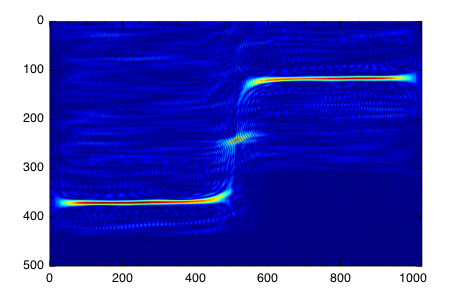

Use fft.


In [475]:
tfrp=cohenclass.tfrpwv(z);indfpwv256=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:]))

Single pseudo Wigner Ville


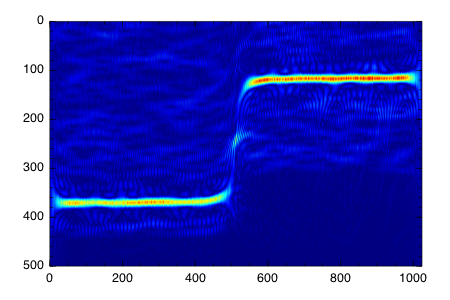

Use fft.


In [476]:
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",8);indfpwv128=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:])./mean(abs(tfrp[500:-1:1,:]),1))

Single pseudo Wigner Ville


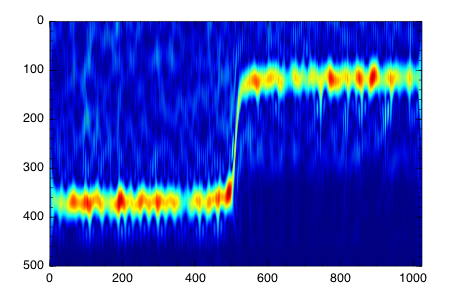

Use fft.


In [477]:
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",32);indfpwv32=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:]))

### adaptive window

In [494]:
include("pwvaw.jl");

In [498]:
fin=collect(linspace(1,500,1024));
varrat=ones(length(x))./(3.16*3.16);

Single pseudo Wigner Ville with the Adaptive Algorithm


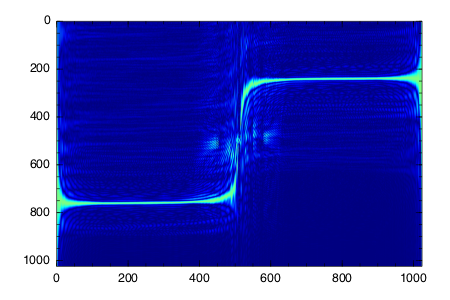

In [499]:
tfra,windows=pwvaw.awpwv(z,varrat,NaN,NaN,fin);imagesc(abs(tfra[end:-1:1,:])./maximum(abs(tfra[end:-1:1,:]),1))

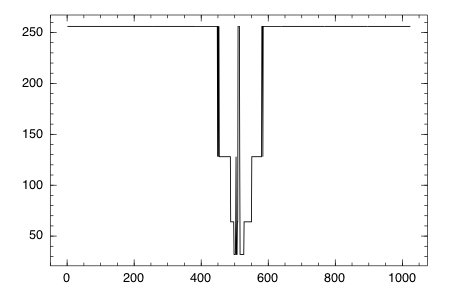

In [500]:
plot(collect(1:length(windows)),map(Float64,windows))

In [501]:
indfn=extif.maxif(abs(tfra));

#### comparison between WV, PWV (fixed window=256 and 32), and  PWV (adaptive)

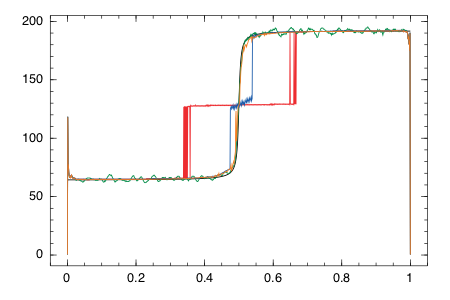

In [502]:
plot(x,abs(iw/(2*pi)),x,indfwv*freqfac,x,indfpwv32*freqfac,x,indfpwv256*freqfac,x,fin[round(Int,indfn)]*freqfac)